In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('bottle.csv')
df.head()

d:\python\odyn\anak2\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [6]:
#show columns with more than 50% of null values
df.columns[df.isnull().mean() > 0.5]

Index(['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'NH3uM', 'C14As1',
       'C14A1p', 'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp',
       'IncTim', 'LightP', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4',
       'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2',
       'pH1', 'DIC Quality Comment'],
      dtype='object')

In [7]:
#show columns with more than 80% of null values
df.columns[df.isnull().mean() > 0.8]

Index(['BtlNum', 'T_qual', 'S_qual', 'SThtaq', 'NH3uM', 'C14As1', 'C14A1p',
       'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'IncTim',
       'LightP', 'R_NH4', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1',
       'DIC Quality Comment'],
      dtype='object')

In [8]:
#make a variable with the columns with more than 50% of null values
cols_to_drop = df.columns[df.isnull().mean() > 0.5]



In [9]:
#drop the columns with more than 50% of null values
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [10]:
#unique values of the columns
df.nunique()

Cst_Cnt         34404
Btl_Cnt        864863
Sta_ID           2634
Depth_ID       864850
Depthm           3219
T_degC          13847
Salnty          14602
O2ml_L           6500
STheta          36368
O2Sat           10379
Oxy_µmol/Kg    391814
RecInd              5
T_prec              3
S_prec              2
P_qual              2
Chlqua              2
Phaqua              2
PO4q                3
SiO3qu              3
NO2q                3
NO3q                4
NH3q                2
C14A1q              2
C14A2q              2
DarkAq              2
MeanAq              2
R_Depth          3219
R_TEMP           2819
R_POTEMP         2857
R_SALINITY       3584
R_SIGMA          4398
R_SVA            5254
R_DYNHT          1848
R_O2              871
R_O2Sat          1453
R_PRES           3328
dtype: int64

In [11]:
#variable with categorical columns
categorical = df.select_dtypes(include=['object'])

#variable with numerical columns
numerical = df.select_dtypes(include=['int64', 'float64'])

In [12]:
categorical

,Sta_ID,Depth_ID
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7
...,...,...
864858,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7
864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3
864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3
864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3


In [13]:
numerical

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.500,33.4400,NaN,25.64900,NaN,NaN,3,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,0
1,1,2,8,10.460,33.4400,NaN,25.65600,NaN,NaN,3,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,8
2,1,3,10,10.460,33.4370,NaN,25.65400,NaN,NaN,7,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,10
3,1,4,19,10.450,33.4200,NaN,25.64300,NaN,NaN,3,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,19
4,1,5,20,10.450,33.4210,NaN,25.64300,NaN,NaN,7,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805,23.87055,108.74,253.47,7,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,2,18.744,33.4083,5.805,23.87072,108.74,253.47,3,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,10,18.161,33.4062,5.816,24.01426,107.74,253.92,3,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [14]:
#copy of df for rows with no null values
df_no_null = df.copy()

#drop rows with null values
df_no_null.dropna(inplace=True)


In [15]:
#copy of df for rows with filling null values with mean for non-categorical columns
#df_mean = df.copy()

#fill null values with mean for non-categorical columns
#df_mean.fillna(df_mean.mean(), inplace=True)

In [16]:
df_no_null.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
2160,71,2161,044.0 048.5,19-4904CR-HY-087-0606-04400485-0000B-3,0,10.30,33.030,5.90,25.364,92.8,...,0.0,10.30,10.30,33.030,25.36,260.2,0.00,5.90,92.8,0
2162,71,2163,044.0 048.5,19-4904CR-HY-087-0606-04400485-0010A-7,10,10.29,32.951,6.04,25.304,95.0,...,10.0,10.29,10.29,32.951,25.30,266.1,0.02,6.04,95.0,10
2163,71,2164,044.0 048.5,19-4904CR-HY-087-0606-04400485-0015A-3,15,10.29,32.990,6.06,25.335,95.3,...,15.0,10.29,10.29,32.990,25.33,263.3,0.04,6.06,95.3,15
2164,71,2165,044.0 048.5,19-4904CR-HY-087-0606-04400485-0020A-7,20,10.33,33.005,6.04,25.339,95.1,...,20.0,10.33,10.33,33.005,25.33,262.9,0.05,6.04,95.1,20
2165,71,2166,044.0 048.5,19-4904CR-HY-087-0606-04400485-0030A-7,30,10.39,33.054,6.01,25.368,94.8,...,30.0,10.39,10.39,33.054,25.36,260.4,0.07,6.01,94.8,30


In [17]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253439 entries, 2160 to 830772
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      253439 non-null  int64  
 1   Btl_Cnt      253439 non-null  int64  
 2   Sta_ID       253439 non-null  object 
 3   Depth_ID     253439 non-null  object 
 4   Depthm       253439 non-null  int64  
 5   T_degC       253439 non-null  float64
 6   Salnty       253439 non-null  float64
 7   O2ml_L       253439 non-null  float64
 8   STheta       253439 non-null  float64
 9   O2Sat        253439 non-null  float64
 10  Oxy_µmol/Kg  253439 non-null  float64
 11  RecInd       253439 non-null  int64  
 12  T_prec       253439 non-null  float64
 13  S_prec       253439 non-null  float64
 14  P_qual       253439 non-null  float64
 15  Chlqua       253439 non-null  float64
 16  Phaqua       253439 non-null  float64
 17  PO4q         253439 non-null  float64
 18  SiO3qu       253439 n

In [18]:
df_mean = pd.read_csv('bottle_mean.csv')
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   864863 non-null  int64  
 1   Cst_Cnt      864863 non-null  int64  
 2   Btl_Cnt      864863 non-null  int64  
 3   Sta_ID       864863 non-null  object 
 4   Depth_ID     864863 non-null  object 
 5   Depthm       864863 non-null  int64  
 6   T_degC       864863 non-null  float64
 7   Salnty       864863 non-null  float64
 8   O2ml_L       864863 non-null  float64
 9   STheta       864863 non-null  float64
 10  O2Sat        864863 non-null  float64
 11  Oxy_µmol/Kg  864863 non-null  float64
 12  RecInd       864863 non-null  int64  
 13  T_prec       864863 non-null  float64
 14  S_prec       864863 non-null  float64
 15  P_qual       864863 non-null  float64
 16  Chlqua       864863 non-null  float64
 17  Phaqua       864863 non-null  float64
 18  PO4q         864863 non-

In [19]:
#import df_mean and df_no_null dataframes into .csv files
df_mean.to_csv('bottle_mean.csv')
df_no_null.to_csv('bottle_no_null.csv')

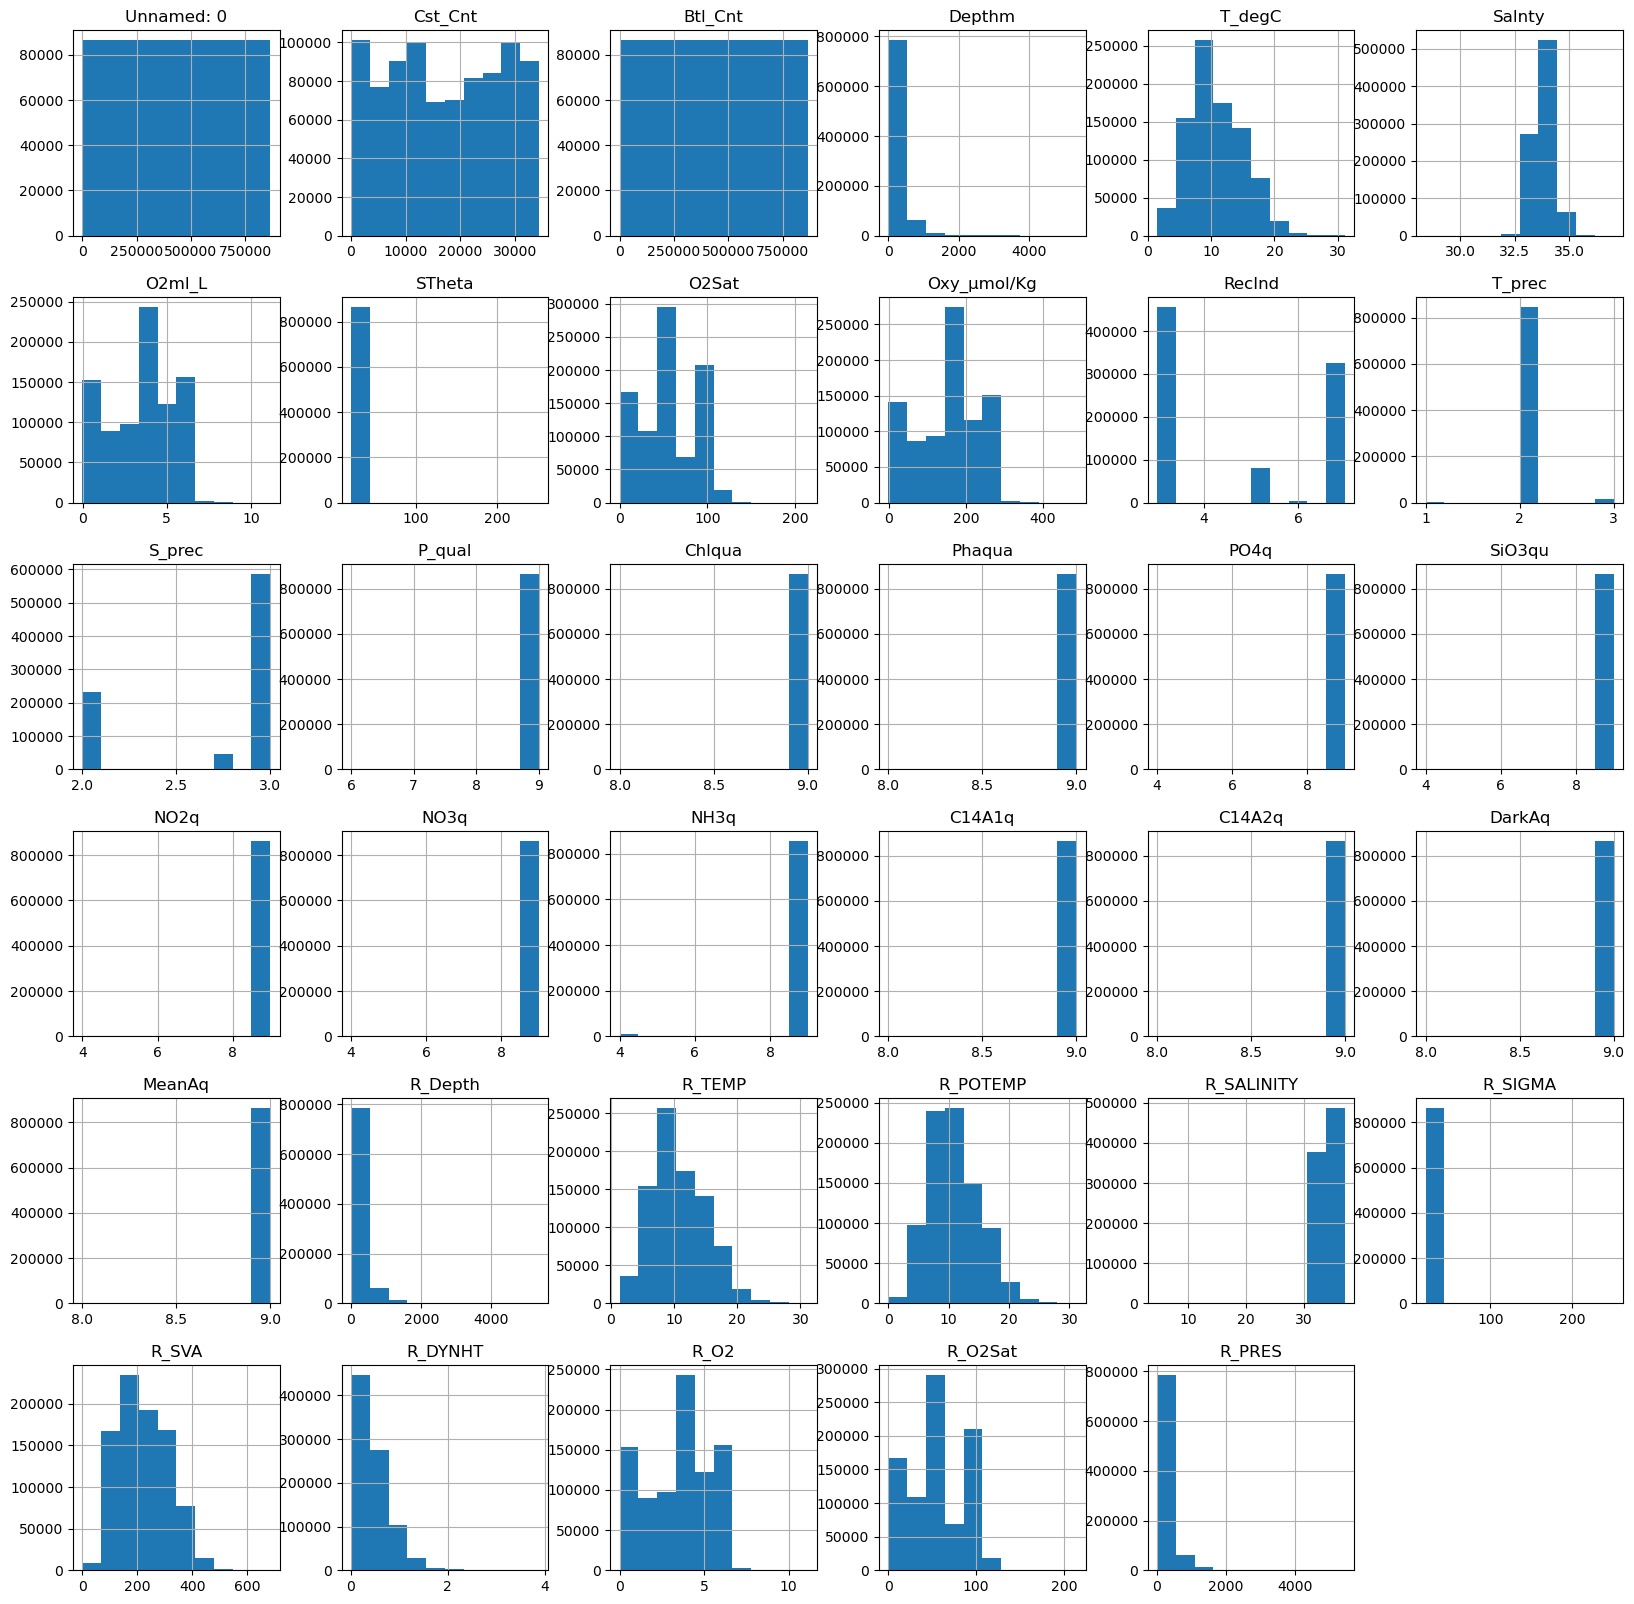

In [20]:
#data visualization
df_mean.hist(figsize=(20,20))

plt.show()

In [21]:
#data visualization with seaborn for df_no_null
#sns.pairplot(df_no_null)


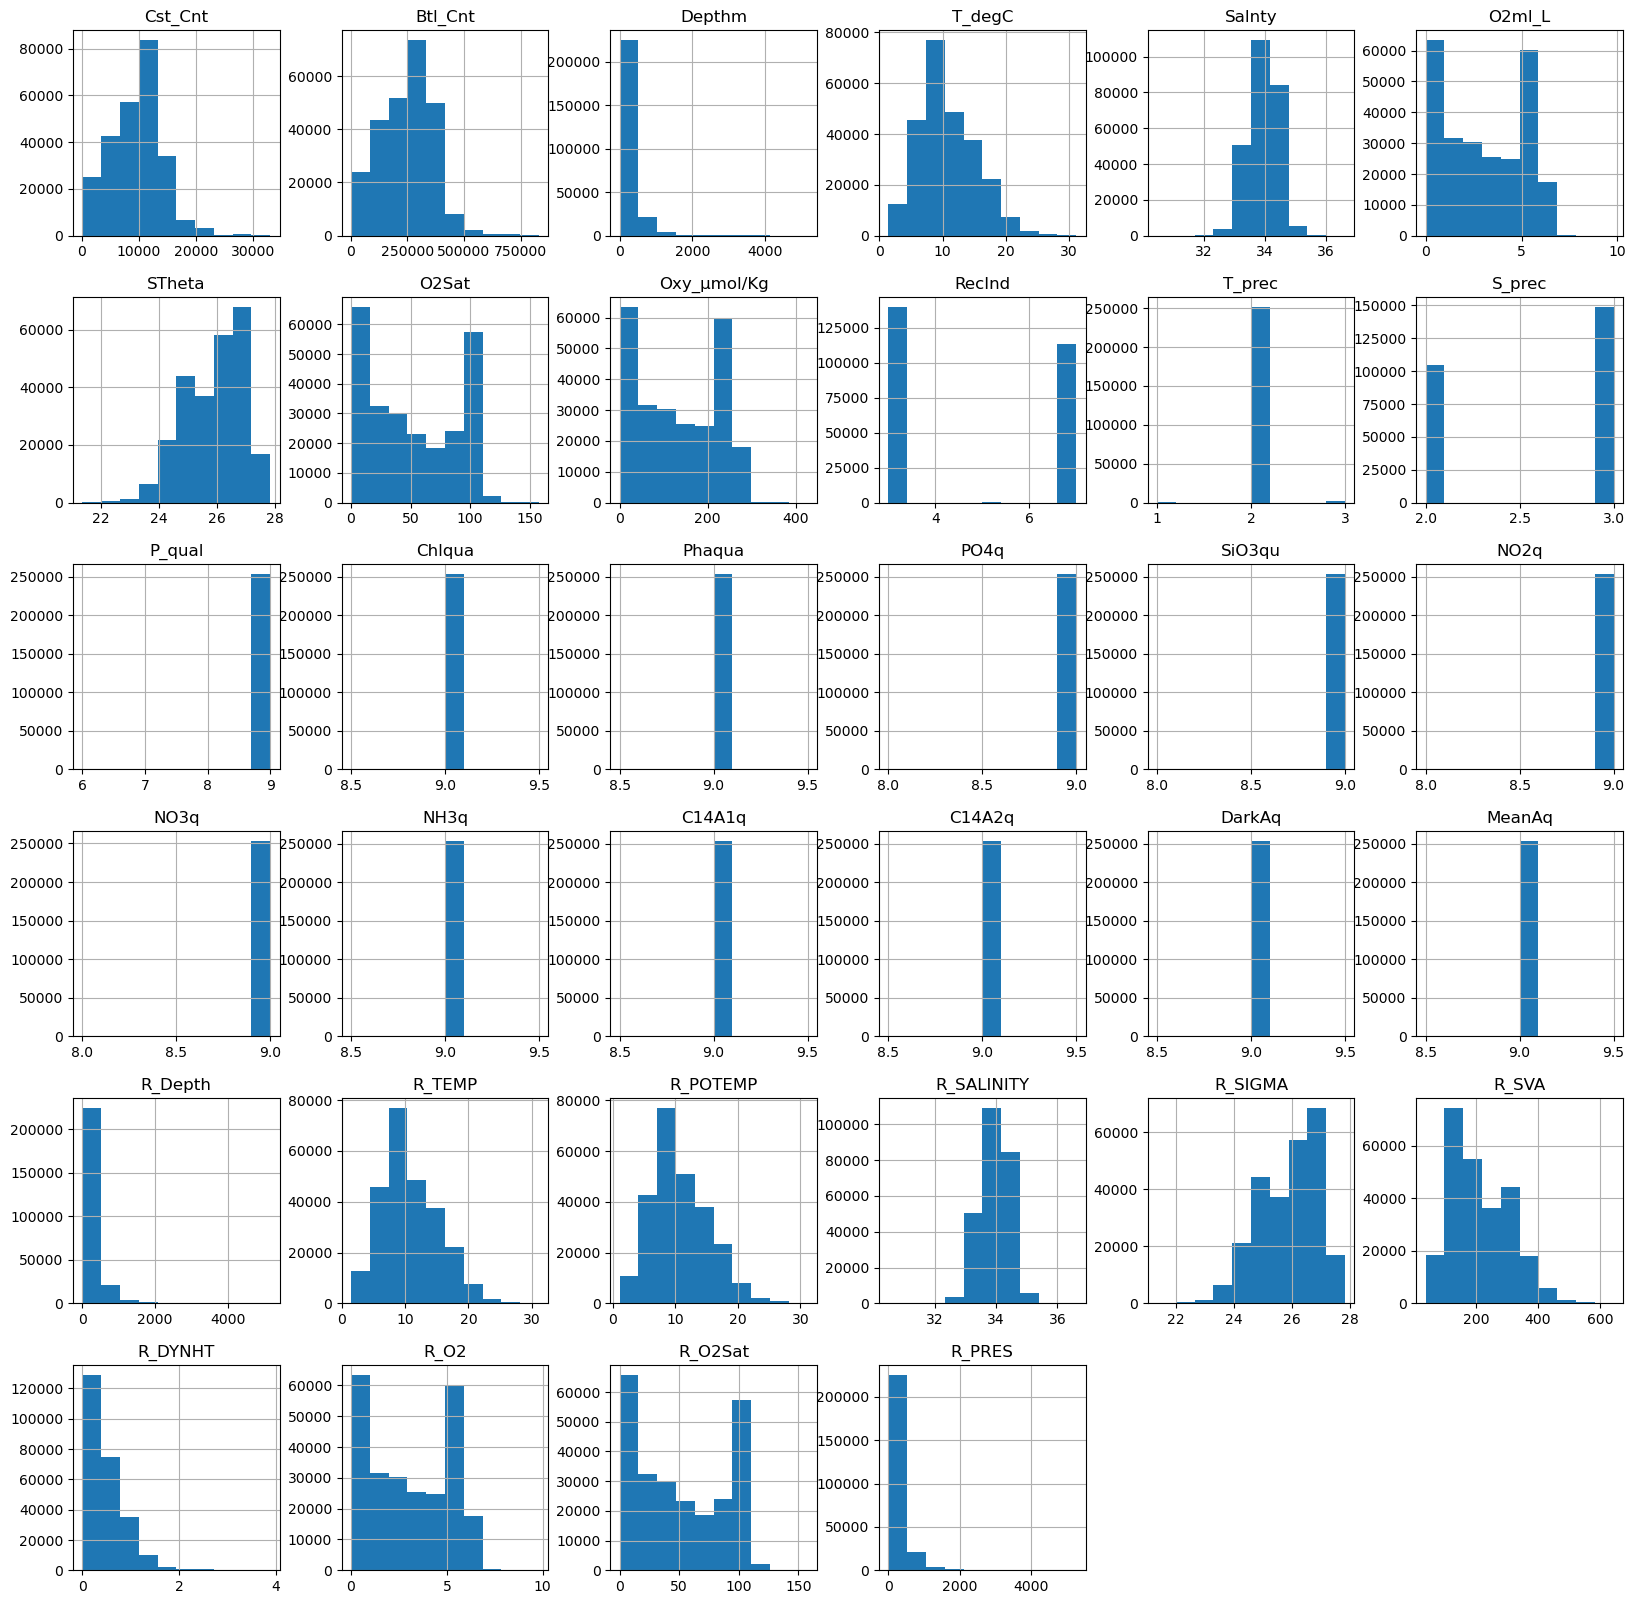

In [22]:
#data visualization
df_no_null.hist(figsize=(20,20))

plt.show()

In [23]:
#cat cols for both dataframes
cat_cols_nn = df_no_null.select_dtypes(include=['object']).columns
cat_cols_mean = df_mean.select_dtypes(include=['object']).columns
#num cols for both dataframes
num_cols_nn = df_no_null.select_dtypes(include=['int64', 'float64']).columns
num_cols_mean = df_mean.select_dtypes(include=['int64', 'float64']).columns


In [24]:
#label encoder for both dataframes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols_nn:
    df_no_null[col] = le.fit_transform(df_no_null[col])
for col in cat_cols_mean:
    df_mean[col] = le.fit_transform(df_mean[col])
    

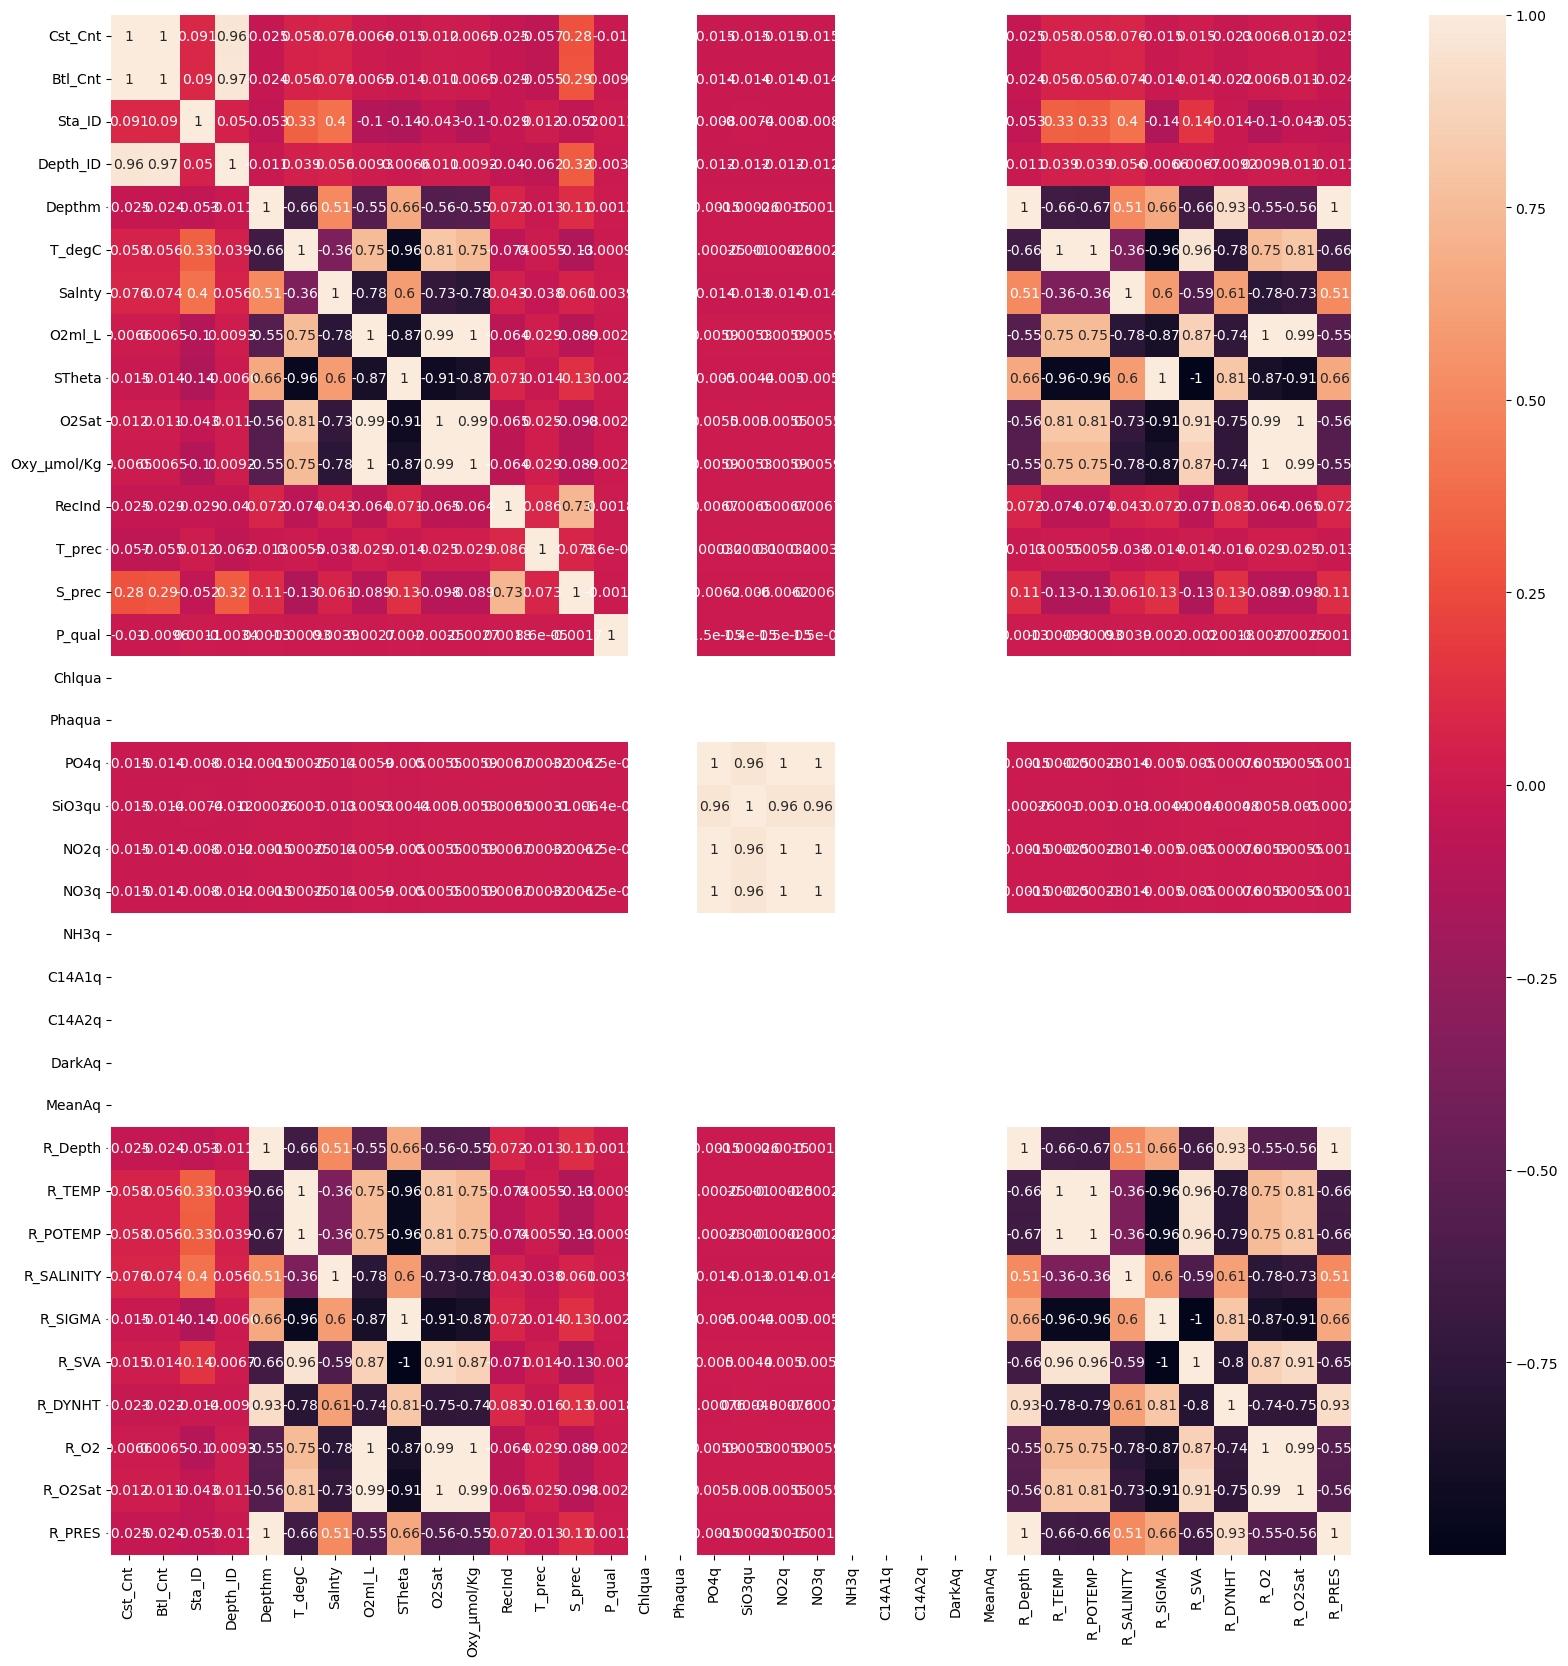

In [28]:
#correlation matrix for both dataframes
corr_nn = df_no_null.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_nn, annot=True)
plt.show()

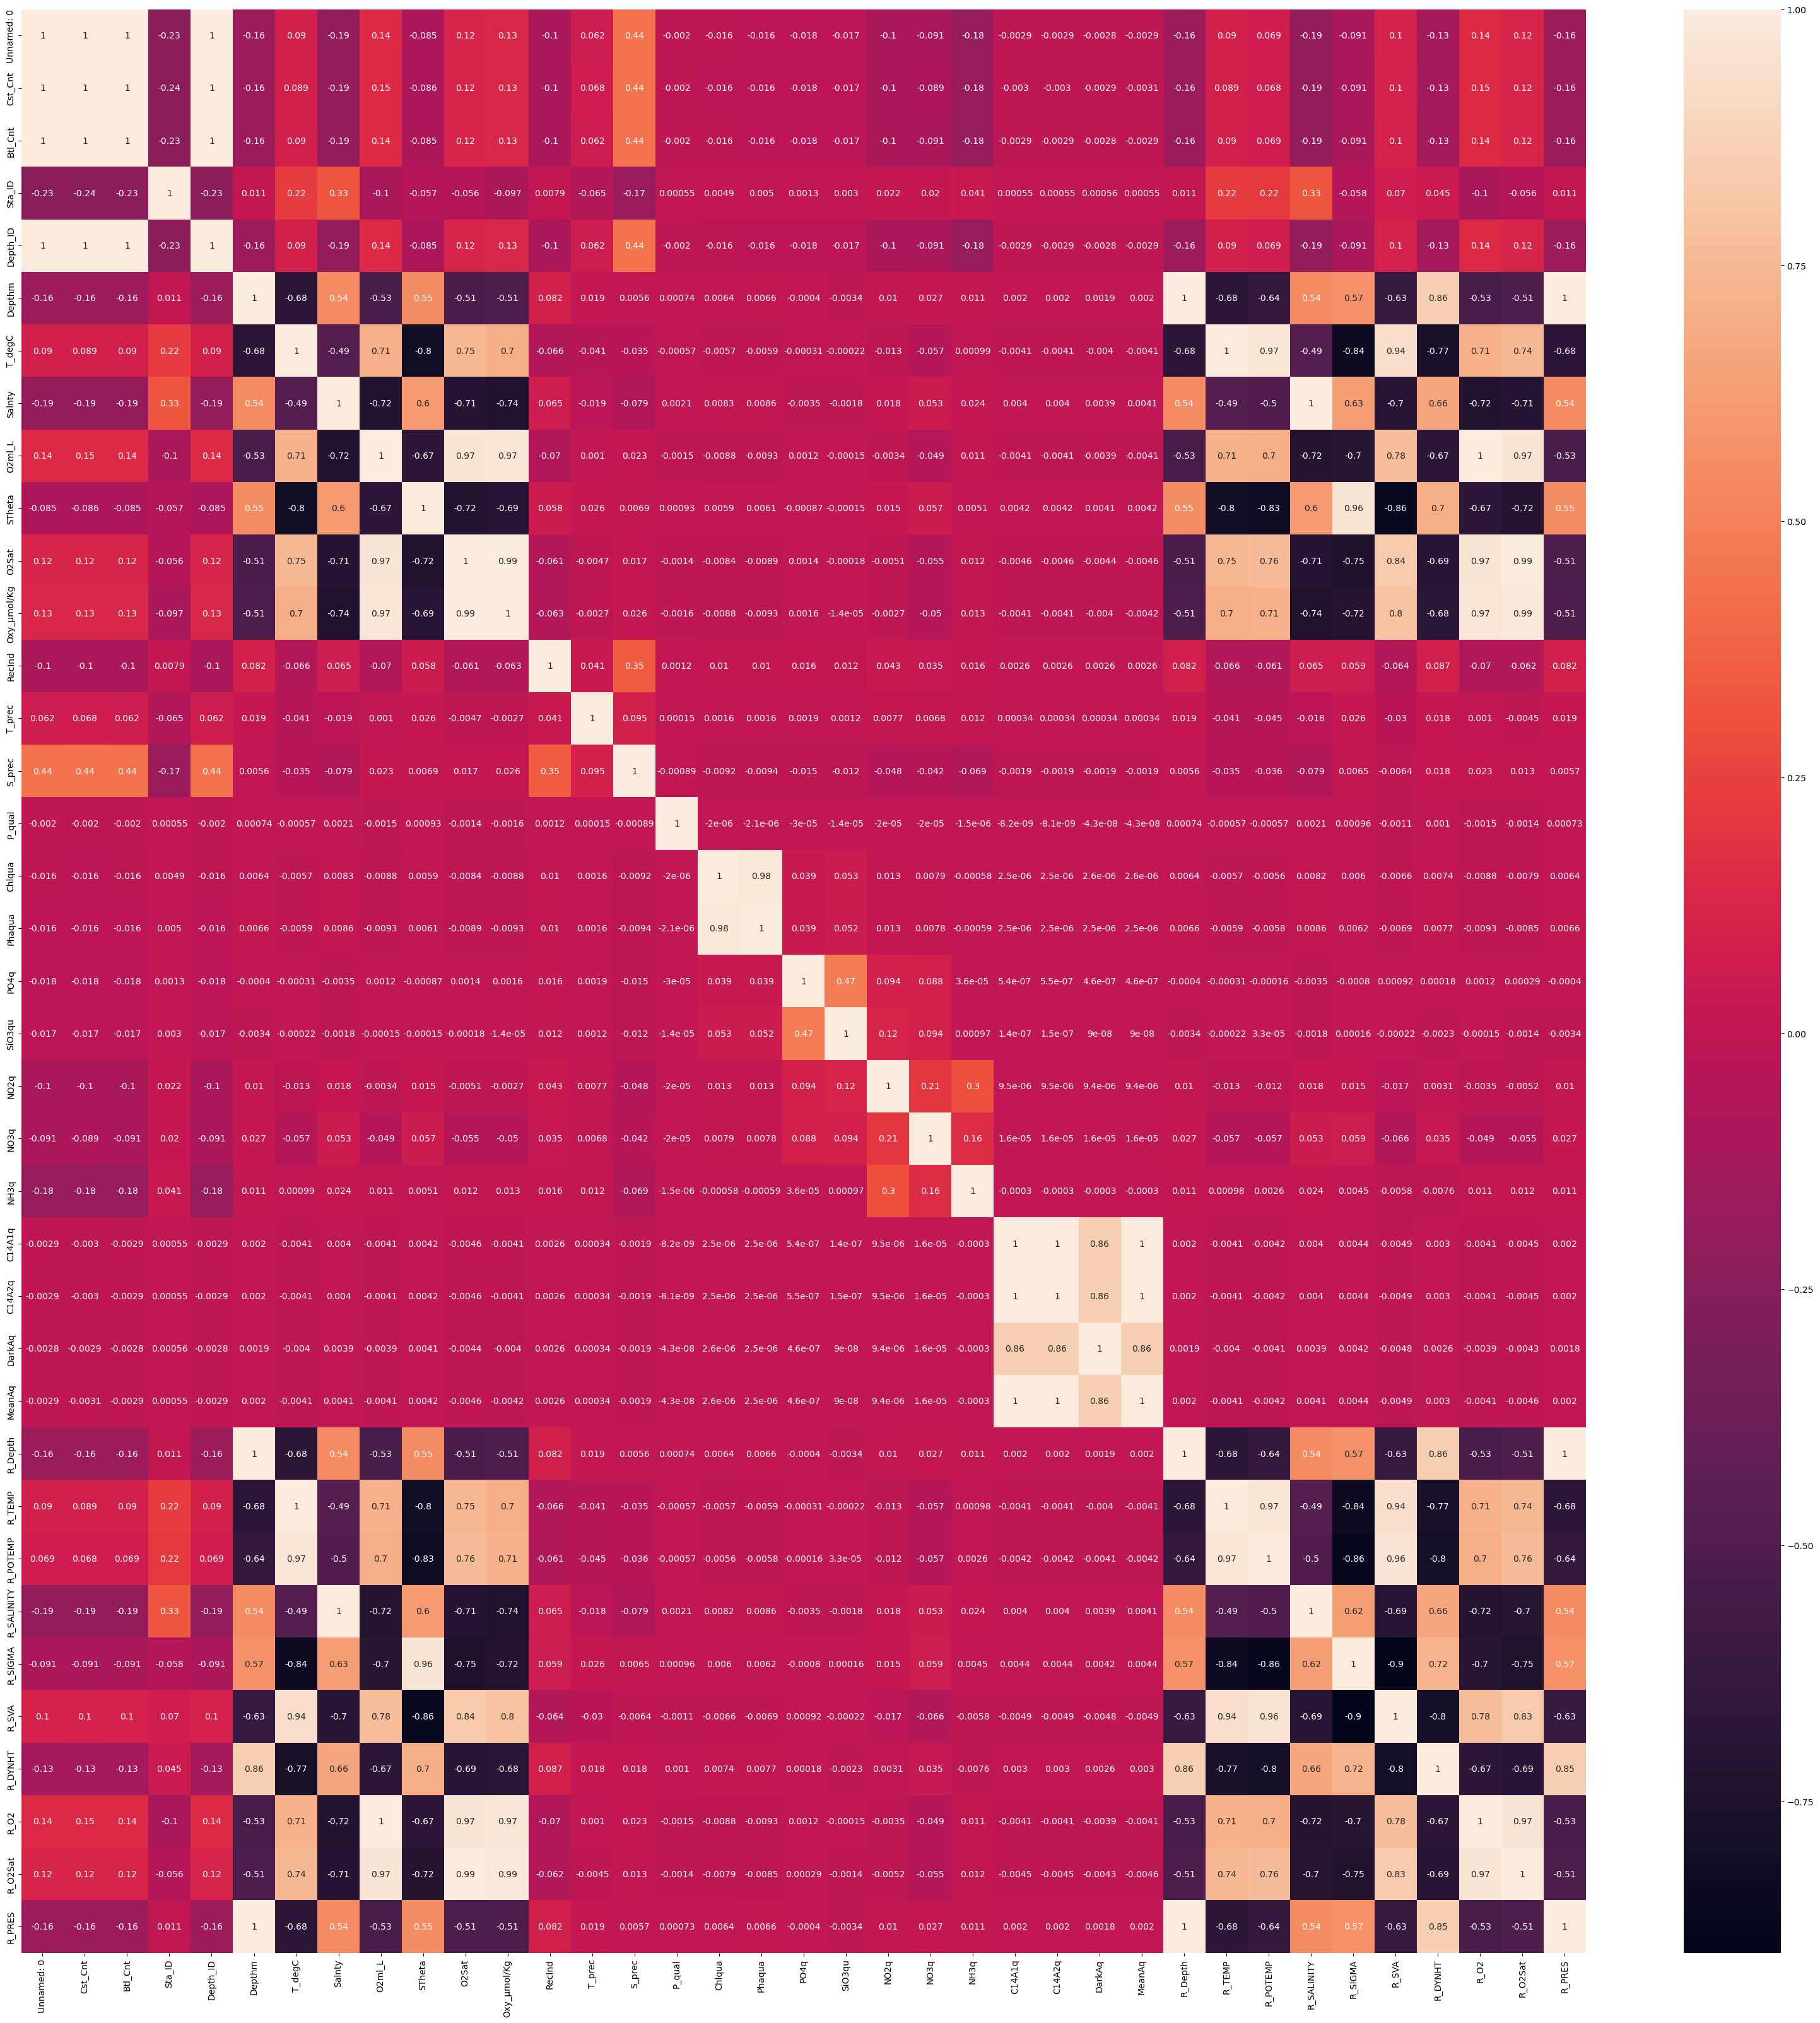

In [30]:
#correlation matrix for both dataframes
corr_mean = df_mean.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_mean, annot=True)
plt.show()